# Data Exploration of USPTO Data

This document is initiated in August 2024. We are exploring several public datasets published by USPTO.
Here are the files as well as their publicly available explanation.

- Patent assignment economics data (stata (.dta) and MS excel (.csv)): Contains detailed information on roughly 10.0 million patent assignments and other transactions recorded at the USPTO since 1970 and involving roughly 17.8 million patents and patent applications. For more information: http://www.uspto.gov/learning-and-resources/electronic-data-products/data

- Patent examination research dataset (stata (.dta) and MS excel : Contains detailed information on more than 13 million publicly viewable patent applications filed with the USPTO along with more than 1 million PCT applications through June 2023. The data files include information on each application's characteristics, prosecution history, continuation history, claims of foreign priority, patent term adjustment history, publication history, and correspondence address information.

- Patent application full text data/XML: Contains (MAR 15, 2001 - present) the full text of each patent application (non-provisional utility and plant) published weekly (Thursdays) (excludes images/drawings). The file format is eXtensible Markup Language (XML) in accordance with the Patent Application International Common Element (ICE) Document Type Definition (DTD).

- Historical masterfile: The historical_masterfile contains micro-level application, NBER sub-category, and prosecution data on 2.2 million patent applications filed from 1981 to 2015 and 8.9 million patents issued through 2014.

- https://patentsview.org/download/data-download-tables


In [3]:
# libraries
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

## Trajtenberg (2002)

After initial data exploration, the most appropriate datasets to replicate his paper are "historical masterfile" and "patent examination research dataset". The two datasets can be matched by application ID. 

- Historical masterfile contains information on publication number, patent number, NBER number, USPC number, application date, prior date, disposal date, application number, as well as other information. 
- Patent examination research dataset provides information on the parent country, foreign parent ID, foreign parent date and application number. 

In [70]:
foreign = pd.read_stata("data/foreign_priority.dta") # Patent examination research dataset (stata (.dta) and MS excel (.csv))
masterfile = pd.read_csv("data/historical_masterfile.csv") # Patent examination research dataset (stata (.dta) and MS excel (.csv))

/var/folders/_c/hqgq6n0s7yl267nvktc1m9l00000gn/T/ipykernel_6425/1063775723.py:2: DtypeWarning: Columns (1,2,4,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  masterfile = pd.read_csv("data/historical_masterfile.csv") # Patent examination research dataset (stata (.dta) and MS excel (.csv))


In [74]:
foreign.dtypes
#foreign.head(10)

application_number     object
foreign_parent_id      object
foreign_parent_date    object
parent_country         object
dtype: object

In [106]:
masterfile = masterfile[masterfile["appl_id"].notnull()]
masterfile["appl_id"] = masterfile["appl_id"].astype('int64')
#masterfile.head(10)

In [131]:
CA_subset = foreign[foreign["parent_country"]=="CANADA"] #Trajtenberg paper has over 45000 data points
CA_subset['appl_id'] = CA_subset["application_number"]
CA_subset = CA_subset[CA_subset["appl_id"].notnull()]
CA_subset = CA_subset[CA_subset['appl_id'].str.isnumeric() == True]

/var/folders/_c/hqgq6n0s7yl267nvktc1m9l00000gn/T/ipykernel_6425/12571759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_subset['appl_id'] = CA_subset["application_number"]


In [132]:
CA_subset = CA_subset[CA_subset['appl_id'].notnull()]
CA_subset['appl_id'] = CA_subset['appl_id'].astype('int64')

In [133]:
data = pd.merge(CA_subset, masterfile, 'inner', on="appl_id")

In [134]:
data["appl_dt"] = pd.to_datetime(data["appl_dt"])

/var/folders/_c/hqgq6n0s7yl267nvktc1m9l00000gn/T/ipykernel_6425/2237299781.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["appl_dt"] = pd.to_datetime(data["appl_dt"])


In [135]:
data

,application_number,foreign_parent_id,foreign_parent_date,parent_country,appl_id,pubno,patent,nber,uspc,uspc_sub,appl_dt,prior_dt,pub_dt,disp_dt,disp_ty,exp_dt,exp_dt_max,pta
0,09463347,2211293,1997-07-23 00:00:00,CANADA,9463347,NaN,-74779,31,435.0,NaN,2000-01-21,21jan2000,NaN,14aug2003,ABN,NaN,NaN,0.0
1,09744718,"2,273,570",1999-05-31 00:00:00,CANADA,9744718,NaN,-2845629,19,203.0,NaN,2001-01-30,30jan2001,NaN,25nov2002,ABN,NaN,NaN,0.0
2,09913258,"2,243,983",1998-09-17 00:00:00,CANADA,9913258,NaN,-2699828,31,424,NaN,2001-08-10,10aug2001,NaN,26feb2004,ABN,NaN,NaN,0.0
3,09926663,"2,302,905",2000-03-29 00:00:00,CANADA,9926663,NaN,-1133201,22,709.0,NaN,2001-11-29,29nov2001,NaN,15jan2003,ABN,NaN,NaN,0.0
4,09959922,"2,307,074",2000-04-28 00:00:00,CANADA,9959922,NaN,-2395226,68,220,NaN,2001-11-13,13nov2001,NaN,03jul2006,ABN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24162,14406916,2779896,2012-06-13 00:00:00,CANADA,14406916,NaN,-1115808,49,307.0,023,2014-12-10,10dec2014,NaN,NaN,PEN,NaN,NaN,NaN
24163,14407041,"2,779,898",2012-06-13 00:00:00,CANADA,14407041,NaN,-356763,45,290.0,044,2014-12-10,10dec2014,NaN,NaN,PEN,NaN,NaN,NaN
24164,14117014,"2,741,240",2011-05-27 00:00:00,CANADA,14117014,NaN,-2119098,80,NaN,NaN,2013-11-11,11nov2013,NaN,18aug2014,ABN,NaN,NaN,0.0
24165,14357468,2758243,2011-11-10 00:00:00,CANADA,14357468,NaN,-1190243,80,NaN,NaN,2014-05-09,09may2014,NaN,NaN,PEN,NaN,NaN,NaN


In [138]:
data["year"] = data["appl_dt"].dt.year

In [149]:
count_agg_year = data.groupby('year').size().reset_index(name='counts')

<Axes: xlabel='year'>

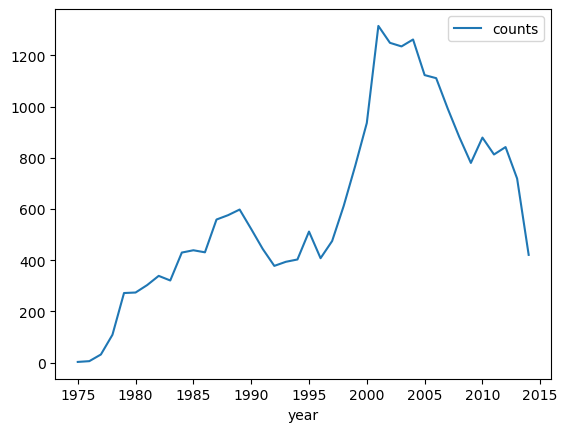

In [152]:
count_agg_year.plot(x="year")

In [157]:
import requests
import json
import pandas as pd
import json_normalize

In [6]:
data = pd.read_csv("data/g_application.tsv", sep='\t') # Patent examination research dataset (stata (.dta) and MS excel (.csv))

/var/folders/_c/hqgq6n0s7yl267nvktc1m9l00000gn/T/ipykernel_15199/223197856.py:1: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/g_application.tsv", sep='\t') # Patent examination research dataset (stata (.dta) and MS excel (.csv))


In [10]:
data['filing_date'] = pd.to_datetime(data['filing_date'])

/var/folders/_c/hqgq6n0s7yl267nvktc1m9l00000gn/T/ipykernel_15199/1689402581.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['filing_date'] = pd.to_datetime(data['filing_date'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1074-08-14, at position 0

In [11]:
data

,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
0,05497504,3963197,05,1074-08-14,05,0.0
1,05508062,3933359,05,1074-09-23,05,0.0
2,05518254,3941467,05,1074-10-29,05,0.0
3,05518570,3936670,05,1074-10-29,05,0.0
4,05555245,4003574,05,1075-03-04,05,0.0
...,...,...,...,...,...,...
8887785,5786216,4135654,5,9177-04-11,05,0.0
8887786,5967990,4255928,5,9178-12-11,05,0.0
8887787,6474610,4474874,6,9183-03-11,06,0.0
8887788,6848010,4732727,6,9186-04-03,06,0.0
